In [1]:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.animation import FuncAnimation, PillowWriter, FFMpegWriter

import semd_utils

In [103]:
events = np.loadtxt("../../tum-vie/events_005_refact_0001.txt")
# this data is already filtered by time, no need to redo it here

In [104]:
# use only the specified patch of input events
patch_center = (360, 640)
patch_size = 630
events = semd_utils.filter_patch(events, patch_center, patch_size)

data_steps = 100 # timesteps to divide the data into
sim_steps = 100 # simulation steps
shape = (patch_size, patch_size)
t_start = events[0, 0]
duration = events[-1, 0] - events[0, 0]

In [105]:
args = {
    "shape":shape,
    "conv_shape": (3, 3),
    "conv_stride": (3, 3),
    "thresh_conv": 0.5,
    "detector_du": 0.1
}
data = semd_utils.run_sim(args, events, data_steps, sim_steps)

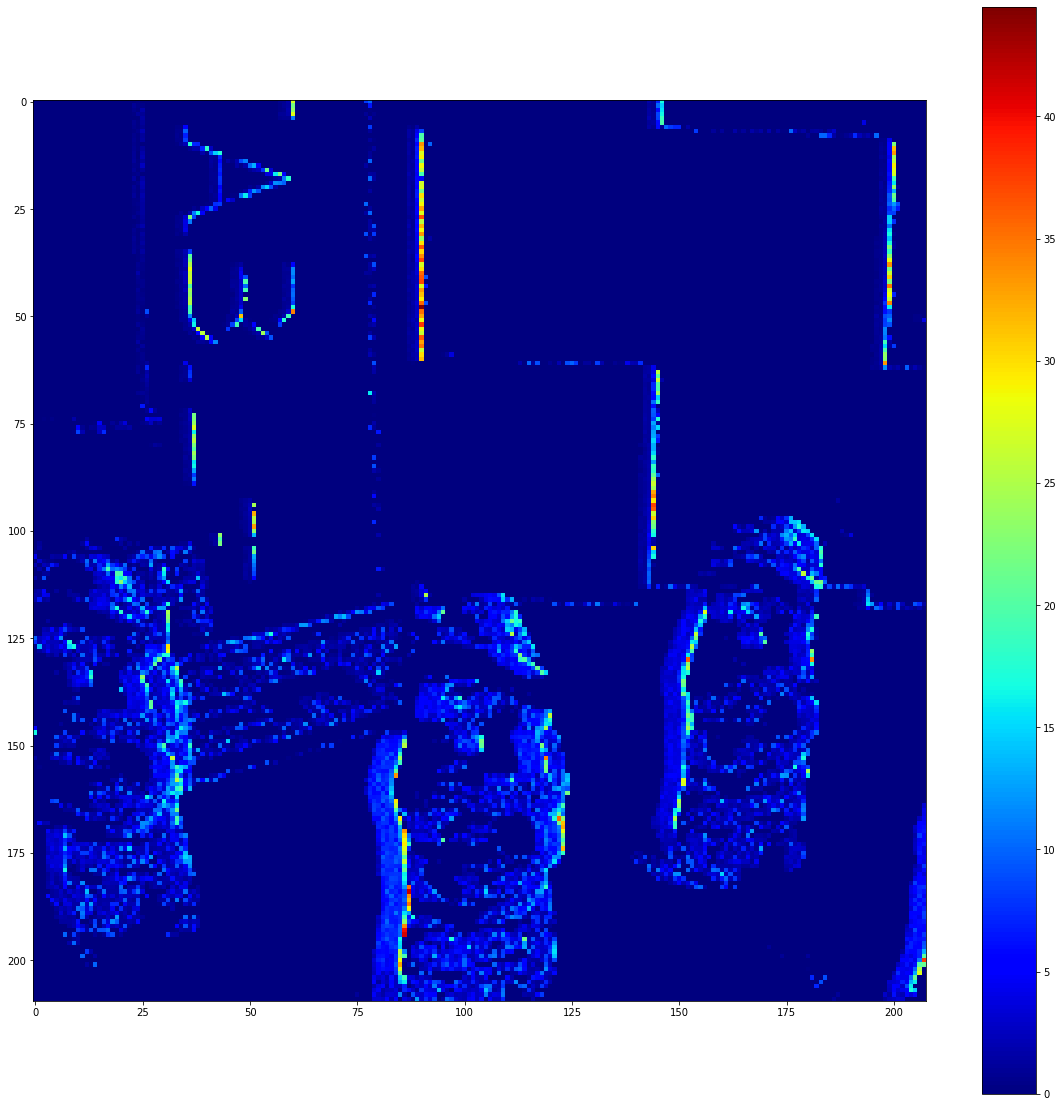

In [106]:
%matplotlib inline
plt.figure(figsize=(20, 20))
m = plt.imshow(np.delete(np.sum(data, axis=-1), 0, 1), cmap="jet")
plt.colorbar(m)

In [107]:
data.max()

10.0

In [108]:
data_m = np.ma.masked_where(data == 0, data)
test = np.ma.median(data_m[:,:,10:], axis=2)

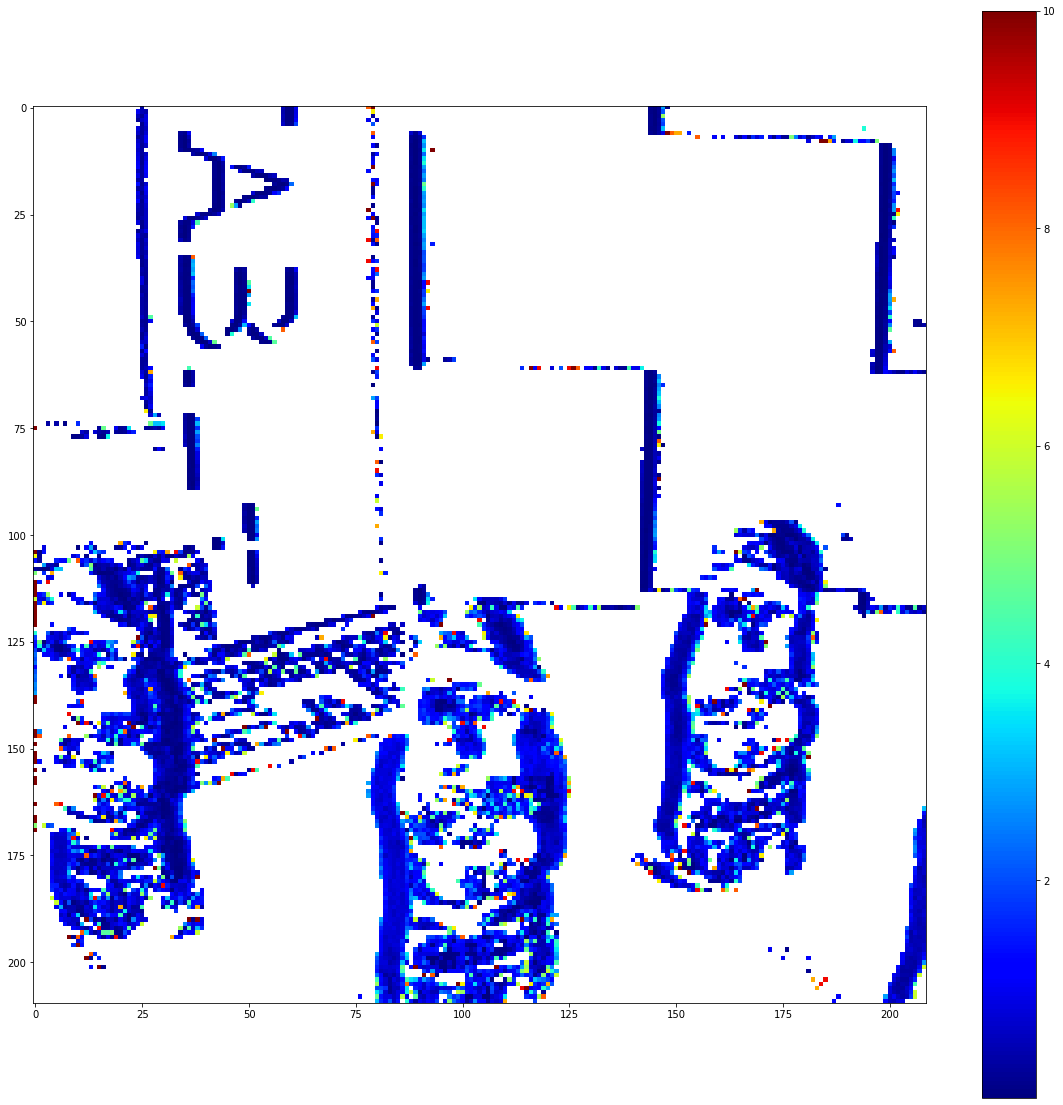

In [109]:
%matplotlib inline
plt.figure(figsize=(20, 20))
m = plt.imshow(test, cmap="jet")
plt.colorbar(mappable=m)

In [110]:
points = []
for x in range(test.shape[1]):
    for y in range(test.shape[0]):
        if test.mask[y, x]:
            continue
        points.append([x, y, test.data[y, x]])
points = np.array(points)

In [101]:
# points[:,2] = np.digitize(points[:,2], np.linspace(points[:,2].min(), points[:,2].max(), 3))

In [102]:
%matplotlib qt
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(projection='3d')
ax.scatter(points[:,0], points[:,1], points[:,2],s=2, c=points[:,2], cmap="jet")
#ax.set_zlim3d([0, 0.02])
plt.show()

In [ ]:
np.save("result_3-3.npy", data)

In [ ]:
args = {
    "shape":shape,
    "conv_shape": (5, 5),
    "conv_stride": (5, 5),
    "thresh_conv": 0.5,
    "detector_du": 0.1
}
data = semd_utils.run_sim(args, events, data_steps, sim_steps)

In [ ]:
%matplotlib inline
plt.figure(figsize=(20, 20))
m = plt.imshow(np.sum(data, axis=-1), cmap="jet")
plt.colorbar(m)

In [ ]:
args = {
    "shape":shape,
    "conv_shape": (5, 5),
    "conv_stride": (2, 2),
    "thresh_conv": 0.5,
    "detector_du": 0.1
}
data = semd_utils.run_sim(args, events, data_steps, sim_steps)

In [ ]:
%matplotlib inline
plt.figure(figsize=(20, 20))
m = plt.imshow(np.sum(data, axis=-1), cmap="jet")
plt.colorbar(m)

In [ ]:
np.save("semd_out_3x3x1_du1", data)

In [ ]:
args = {
    "shape":shape,
    "conv_shape": (5, 5),
    "conv_stride": (1, 1),
    "thresh_conv": 0.5,
    "detector_du": 0.1
}
data = semd_utils.run_sim(args, events, data_steps, sim_steps)

In [ ]:
%matplotlib inline
plt.figure(figsize=(20, 20))
m = plt.imshow(np.sum(data, axis=-1), cmap="jet")
plt.colorbar(m)

In [ ]:
%matplotlib notebook
plt.figure(figsize=(20, 20))
fig, ax = plt.subplots()
img_data = data[:,:,0]
img = plt.imshow(img_data, cmap="jet", vmin=0, vmax=10)

def update(frame):
    img_data = data[:,:,frame]
    img.set_array(img_data)
    return [img]

ani = FuncAnimation(fig, update, frames=sim_steps, blit=True, interval=duration/100)

In [ ]:
ani.save("TLI_300.gif", dpi=300, writer=PillowWriter(fps=60))

In [ ]:
# ani.save("TLIa.mp4", writer=FFMpegWriter(fps=60))